In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import os
import copy
from football_sim.all import Calibrator, Season,Settings
%matplotlib inline

In [2]:
base_dir = './'

settings = Settings(os.path.join(base_dir, 'config.yaml'))
calib = Calibrator(settings)
calib.download_all_data() 
calib.process_data()
season = 2019
league = 'BPL'
calib.calibrate_teams(league,season)

In [3]:
season = Season(league, season,calib, use_home_advantage=False)
print('home advantage', season.home_advantage)

season.process_current_results()
season.simulate_season(n_scenarios=100000)
season.process_simulation()
season.season_report()

home advantage 1


,Played,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,33,89,99.1,94,104,1,1,100.0,100.00,5.66,0.24,0.00
Manchester City,33,66,78.9,75,81,2,2,0.0,100.00,7.06,0.21,0.00
Chelsea,34,60,66.9,63,70,5,3,0.0,75.88,5.33,0.31,0.00
Leicester City,34,59,65.8,62,69,5,3,0.0,64.64,4.33,0.28,0.00
Manchester United,33,55,65.5,61,70,6,3,0.0,55.88,5.16,0.22,0.00
Wolverhampton,33,52,60.4,56,65,8,5,0.0,3.55,3.42,0.21,0.00
Arsenal,34,50,56.4,52,60,10,6,0.0,0.00,4.26,0.29,0.00
Tottenham Hotspur,33,48,55.4,51,60,11,6,0.0,0.03,4.01,0.36,0.00
Sheffield United,33,48,52.6,49,57,12,7,0.0,0.00,2.97,0.36,0.00
Everton,33,44,51.9,47,57,13,8,0.0,0.00,3.58,0.30,0.00


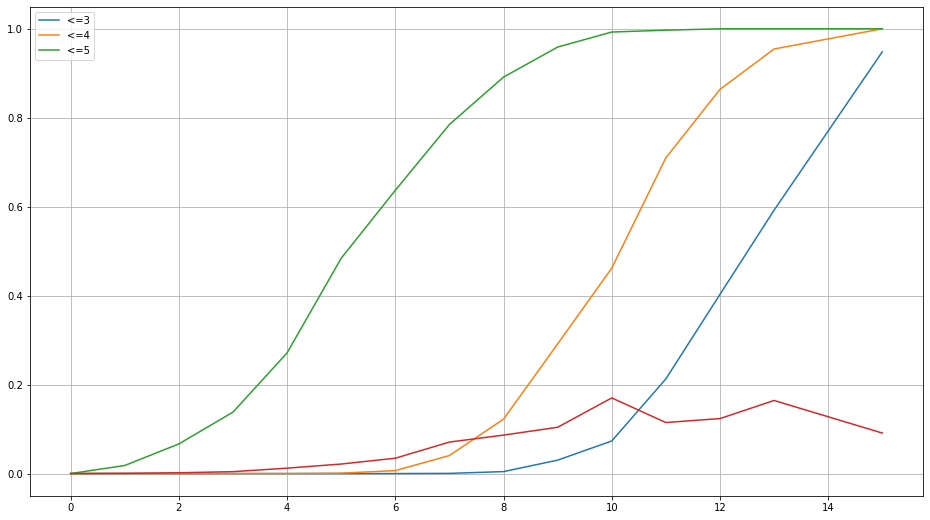

In [4]:

def plot_place_per_points(team_name,lgh):
    p0=lgh.current_points[team_name]

    i=lgh.team_id[team_name]

    #p0=league.current_points['Wolverhampton']
    #i = league.team_id['Wolverhampton']

    P=(lgh.points_per_team[i,:]-p0).astype(int)
    pp=np.unique(P)

    prob4=[]
    prob3=[]
    prob5=[]
    probp=[]
    for p in pp:
        ind =( P==p)
        probp.append(ind.sum()/ind.size)
        prob4.append(np.sum(lgh.place_per_team[i,ind]<=4)/ind.sum())
        prob3.append(np.sum(lgh.place_per_team[i,ind]<=3)/ind.sum())
        prob5.append(np.sum(lgh.place_per_team[i,ind]<=5)/ind.sum())

    C = len([x for x in lgh.matches_to_sim if team_name in [x.home_team.name,x.away_team.name]])
    C=1
    plt.figure(figsize=(16,9))
    plt.plot(pp/C,prob3,label='<=3')
    plt.plot(pp/C,prob4,label='<=4')
    plt.plot(pp/C,prob5,label='<=5')
    plt.plot(pp/C,probp)
    plt.grid(True)
    plt.legend()
plot_place_per_points(season.teams['Manchester United'].name,season)
#plot_place_per_points(league.teams['Wolverhampton'].name,league)

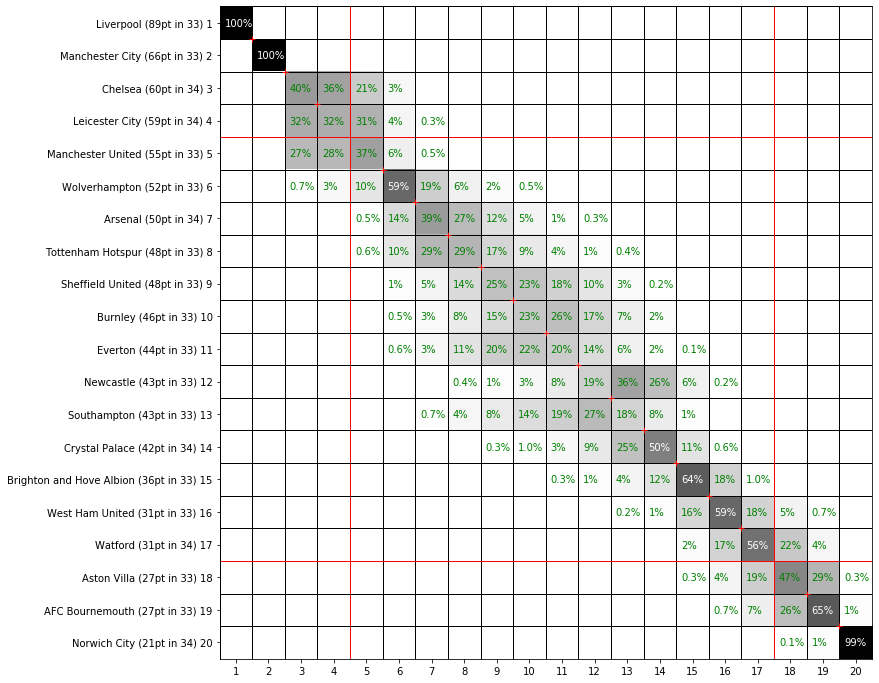

In [5]:
season.probability_grid();

In [6]:
season.matches_remaining()

,Date,Home,Away,Home Wins,Draw,Away Wins,av HG,av AG
0,2020-07-08,Brighton and Hove Albion,Liverpool,14.9,22.3,62.8,0.8,1.8
1,2020-07-08,West Ham United,Burnley,39.3,26.3,34.4,1.4,1.3
2,2020-07-08,Manchester City,Newcastle,82.3,11.8,5.9,2.9,0.7
3,2020-07-08,Sheffield United,Wolverhampton,18.7,30.0,51.3,0.6,1.2
4,2020-07-09,Aston Villa,Manchester United,11.9,19.1,69.0,0.7,2.1
5,2020-07-09,Everton,Southampton,40.1,27.2,32.7,1.3,1.2
6,2020-07-09,AFC Bournemouth,Tottenham Hotspur,23.0,21.9,55.1,1.2,1.9
10,2020-07-11,Norwich City,West Ham United,22.9,24.7,52.4,1.0,1.6
9,2020-07-11,Liverpool,Burnley,66.9,20.2,12.8,2.0,0.7
11,2020-07-11,Sheffield United,Chelsea,17.0,21.6,61.4,0.9,1.9


In [7]:
[f for f in season.matches_to_sim if 'Leicester City' in [f.home_team.name,f.away_team.name]]

[             metric  AFC Bournemouth  Leicester City
 0             goals              NaN             NaN
 1                xg              NaN             NaN
 2              nsxg              NaN             NaN
 3                ag              NaN             NaN
 4  forecasted goals          0.91648         2.12048
 5   win probability         15.23400        64.86800
 6  draw probability         19.89800        19.89800,
              metric  Leicester City  Sheffield United
 0             goals             NaN               NaN
 1                xg             NaN               NaN
 2              nsxg             NaN               NaN
 3                ag             NaN               NaN
 4  forecasted goals         1.57895           0.81906
 5   win probability        55.30500          19.49400
 6  draw probability        25.20100          25.20100,
              metric  Tottenham Hotspur  Leicester City
 0             goals                NaN             NaN
 1            

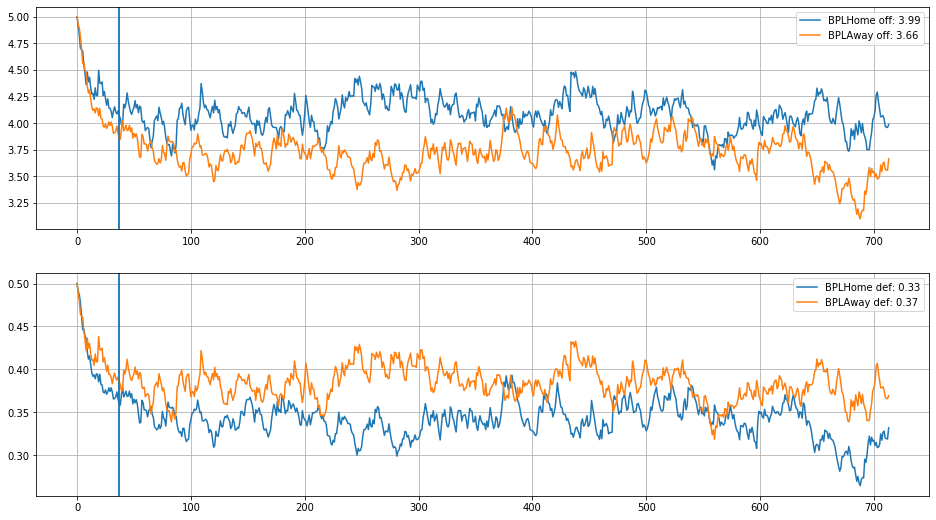

In [8]:
ax=None
for team in calib.teams.values():
    #if team.name in ['Manchester United','Leicester City','Chelsea']:
    if team.name in ['BPLHome','BPLAway']:
        ax=team.plt(ax=ax)
        ax[0].axvline(x=37)
        ax[1].axvline(x=37)


In [9]:
20*19*2

760

In [10]:
correct = []
for f in calib.get_fixtures_for_league('BPL',2019,completed=True):
    correct.append(f.forecast_result==f.result)

In [11]:
np.sum(correct)/len(correct)

0.5255255255255256

In [12]:
len(correct)

333